In [7]:
from IPython.display import Image
%matplotlib inline
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [11]:
X = iris.data[:,[2,3]]
Y = iris.target

In [16]:
print('Class labels:', np.unique(Y))

('Class labels:', array([0, 1, 2]))


In [17]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [18]:
#Standardizing the features:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)  #Compute the mean and std to be used for later scaling.
x_train_std = sc.transform(x_train)   #Fit to data, then transform it.
x_test_std = sc.transform(x_test)

In [21]:
x_train_std

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938],
       [ 0.03977182, -0.16287405],
       [ 1.26474398,  1.38014325],
       [ 0.48521625,  0.48004983],
       [-0.01590873, -0.16287405],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.48521625,  0.22288028],
       [ 0.76361901,  0.99438893],
       [ 0.37385514,  0.48004983],
       [-1.24088089, -1.32013702],
       [ 0.70793846,  0.86580415],
       [ 0.20681348,  0.0942955 ],
       [-0.12726983,  0.0942955 ],
       [ 0.09545238,  0.0942955 ],
       [ 0.42953569,  0.22288028],
       [ 1.20906343,  0.73721938],
       [-1.29656144, -1.32013702],
       [-1.51928365, -1.4487218 ],
       [ 0.81929956,  0.86580415],
       [ 0.20681348, -0.03428927],
       [-1.18520034, -1.32013702],
       [-1.29656144,

In [22]:
#Training a perceptron via scikit-learn
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(x_train_std,y_train)  #Fit linear model with Stochastic Gradient Descent.

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [26]:
y_test.shape
y_pred = ppn.predict(x_test_std)
print "misclassified", (y_pred!=y_test).sum()

misclassified 4


In [29]:
from sklearn.metrics import accuracy_score
print "Accuracy score ", accuracy_score(y_test,y_pred)

Accuracy score  0.911111111111


In [36]:
#training a logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000, random_state=0)
lr.fit(x_train_std, y_train)
lr.predict_proba(x_test_std[0, :])

/Library/Python/2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [39]:
# svm classification
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(x_train, y_train)
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
X_combined = np.vstack((x_train, x_test))

In [52]:
import pandas as pd
from io import StringIO

In [56]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(unicode(csv_data)))
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [60]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [62]:
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,10,11


In [63]:
df.dropna(axis=0)

,A,B,C,D
0,1,2,3,4


In [65]:
# only drop rows where all columns are NaN  
df.dropna(how='all')

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [69]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1,2,3,4


In [73]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1,2,3,4
2,10,11,12,NaN


In [86]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='median',axis=0,verbose=1) #mean , median, most_frequent
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [87]:
imr.transform(df.values)

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [88]:
# handling categorical data
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [89]:
# Mapping ordinal features
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [94]:
# one hot encoding on the nominal features
from sklearn.preprocessing import LabelEncoder
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [95]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [96]:
#####handon example of preprocessing data on wine data set
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [98]:
from sklearn.cross_validation import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [99]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [105]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [106]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


In [107]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


In [108]:
lr.intercept_

array([-0.38383089, -0.15808375, -0.70042788])

In [109]:
lr.coef_

array([[ 0.28027677,  0.        ,  0.        , -0.02788504,  0.        ,
         0.        ,  0.71012536,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23605742],
       [-0.64396762, -0.06877096, -0.05720194,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92676272,
         0.06016437,  0.        , -0.37108985],
       [ 0.        ,  0.06150819,  0.        ,  0.        ,  0.        ,
         0.        , -0.63573464,  0.        ,  0.        ,  0.49792555,
        -0.3584395 , -0.5713892 ,  0.        ]])

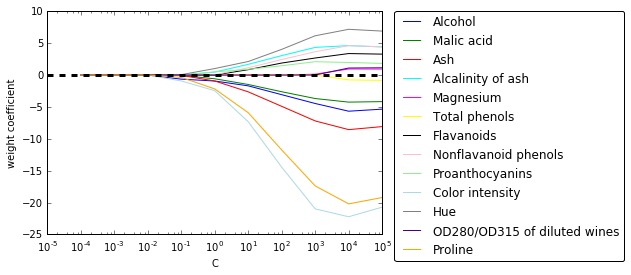

In [110]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()
#http://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb